## Imports

In [2]:
import tensorflow as tf
%run /kaggle/input/notebook-1/Models.ipynb import *
%run /kaggle/input/notebook-1/Utils.ipynb import *

## Prepare Data

In [3]:
# load the data from keras datasets
fashion_mnist = tf.keras.datasets.fashion_mnist
# divide the data into train and test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
data_processor = DataPreparator((X_train, X_test), (y_train, y_test))
# normalize train and test data
X_train, X_test = data_processor.normalize_data(value=255.0)
# add channel dimension for train and test data to be suitable for the CNN network
X_train, X_test = data_processor.reshape_data(axis=-1)
# encode train and test labels
y_train_encoded, y_test_encoded = data_processor.encode_labels()

### Transfer Learning

We will use other two CNNs Pretrained models and modify their **Architecture** to be suitable for number of classes in **Fashion-MNIST** dataset, and fine tune the pretrained models in our dataset

The Pretrained models are **VGG19** and **Inception_v3**

### VGG19

In [8]:
# VGG19 model
model = vgg19()
vgg19 = model.create_model(include_top= False, weights='imagenet', input_shape=(32,32,3))
vgg19.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 20,189,898
Trainable params: 165,514
Non-trainable params: 20,024,384
_______________________________________

In [9]:
X_train_vgg19, X_test_vgg19 =  model.transform_data(X_train, X_test)
print('The shape of the train data after reshaping for VGG19', X_train_vgg19.shape)
print('The shape of the test data after reshaping for VGG19', X_test_vgg19.shape)

The shape of the train data after reshaping for VGG19 (60000, 32, 32, 3)
The shape of the test data after reshaping for VGG19 (10000, 32, 32, 3)


In [10]:
# Training of VGG19
history = vgg19.fit(x= X_train_vgg19,y= y_train_encoded, batch_size= 256, epochs= 25, validation_split= 0.1)

Epoch 1/25
211/211 [==============================] - 21s 53ms/step - loss: 0.6608 - accuracy: 0.7731 - val_loss: 0.5018 - val_accuracy: 0.8132
Epoch 2/25
211/211 [==============================] - 9s 43ms/step - loss: 0.4459 - accuracy: 0.8398 - val_loss: 0.4416 - val_accuracy: 0.8402
Epoch 3/25
211/211 [==============================] - 9s 43ms/step - loss: 0.4020 - accuracy: 0.8547 - val_loss: 0.4122 - val_accuracy: 0.8515
Epoch 4/25
211/211 [==============================] - 10s 45ms/step - loss: 0.3790 - accuracy: 0.8631 - val_loss: 0.3923 - val_accuracy: 0.8602
Epoch 5/25
211/211 [==============================] - 9s 44ms/step - loss: 0.3610 - accuracy: 0.8696 - val_loss: 0.3898 - val_accuracy: 0.8585
Epoch 6/25
211/211 [==============================] - 9s 44ms/step - loss: 0.3437 - accuracy: 0.8748 - val_loss: 0.3935 - val_accuracy: 0.8587
Epoch 7/25
211/211 [==============================] - 9s 45ms/step - loss: 0.3306 - accuracy: 0.8794 - val_loss: 0.3691 - val_accuracy: 0.86

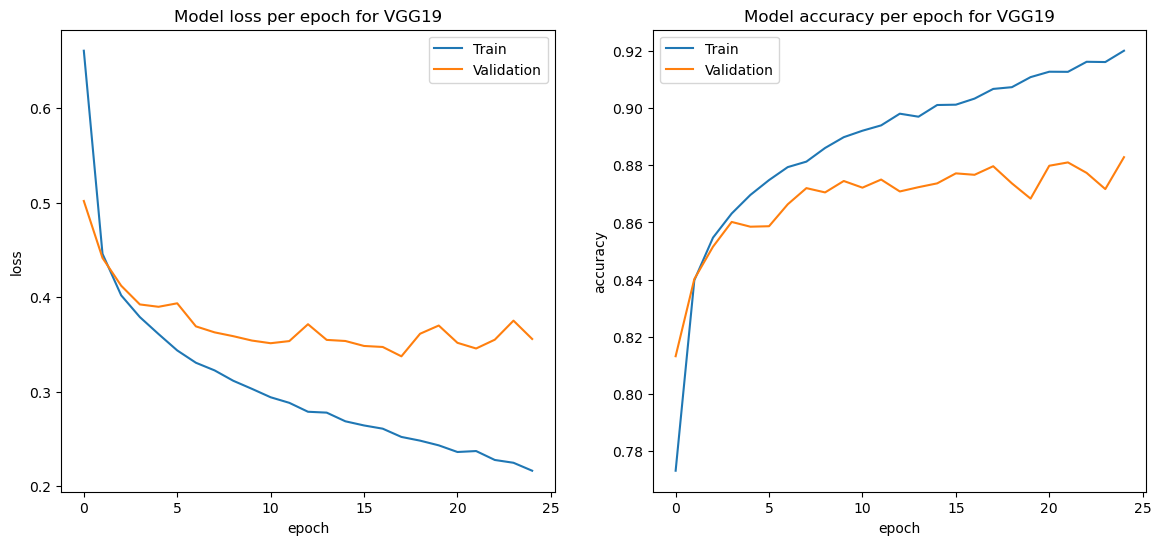

In [11]:
# visualize accuracy and loss curves of VGG19
logs = TrainLogs(model=vgg19)
logs.train_curves(history, 'for VGG19')

In [12]:
# evaluation of the VGG19 on the test data
loss, accuracy = vgg19.evaluate(x= X_test_vgg19,y= y_test_encoded, batch_size= 256)
print('The loss of the VGG19 on test data is:', loss, 'and the accuracy is:', accuracy)

40/40 [==============================] - 2s 48ms/step - loss: 0.3553 - accuracy: 0.8806
The loss of the VGG19 on test data is: 0.3553202152252197 and the accuracy is: 0.8805999755859375


In [13]:
# free memory ram resources from VGG19
del vgg19
del history
del X_train_vgg19
del X_test_vgg19

### InceptionV3

In [5]:
# InceptionV3 model
model = Inception_V3()
inception_v3 = model.create_model(include_top=False, weights='imagenet', input_shape=(76,76,3))
inception_v3.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 22,361,514
Trainable params: 558,730
Non-trainable params: 21,802,784
_______________________________________

In [6]:
X_train_inception_v3, X_test_inception_v3 =  model.transform_data(X_train, X_test)
print('The shape of the train data after reshaping for InceptionV3', X_train_inception_v3.shape)
print('The shape of the test data after reshaping for InceptionV3', X_test_inception_v3.shape)

The shape of the train data after reshaping for InceptionV3 (60000, 76, 76, 3)
The shape of the test data after reshaping for InceptionV3 (10000, 76, 76, 3)


In [7]:
# Training of InceptionV3
history = inception_v3.fit(x= X_train_inception_v3,y= y_train_encoded, batch_size= 256, epochs= 25, validation_split= 0.1)

Epoch 1/25
211/211 [==============================] - 25s 63ms/step - loss: 0.5864 - accuracy: 0.7917 - val_loss: 0.4773 - val_accuracy: 0.8230
Epoch 2/25
211/211 [==============================] - 10s 46ms/step - loss: 0.4148 - accuracy: 0.8474 - val_loss: 0.4577 - val_accuracy: 0.8300
Epoch 3/25
211/211 [==============================] - 9s 43ms/step - loss: 0.3661 - accuracy: 0.8647 - val_loss: 0.4211 - val_accuracy: 0.8450
Epoch 4/25
211/211 [==============================] - 10s 45ms/step - loss: 0.3332 - accuracy: 0.8754 - val_loss: 0.4170 - val_accuracy: 0.8483
Epoch 5/25
211/211 [==============================] - 10s 46ms/step - loss: 0.3033 - accuracy: 0.8869 - val_loss: 0.4044 - val_accuracy: 0.8555
Epoch 6/25
211/211 [==============================] - 9s 43ms/step - loss: 0.2757 - accuracy: 0.8973 - val_loss: 0.4323 - val_accuracy: 0.8438
Epoch 7/25
211/211 [==============================] - 10s 45ms/step - loss: 0.2492 - accuracy: 0.9075 - val_loss: 0.4328 - val_accuracy: 0

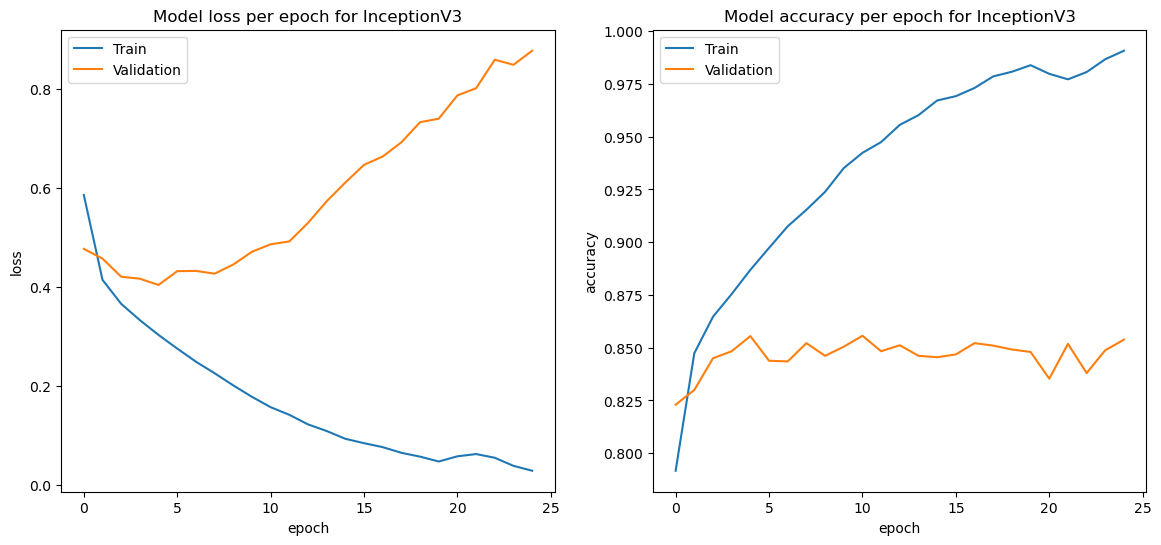

In [8]:
# visualize accuracy and loss curves of InceptionV3
logs = TrainLogs(model=inception_v3)
logs.train_curves(history, 'for InceptionV3')

In [9]:
# evaluation of the InceptionV3 on the test data
loss, accuracy = inception_v3.evaluate(x= X_test_inception_v3,y= y_test_encoded, batch_size= 256)
print('The loss of the InceptionV3 on test data is:', loss, 'and the accuracy is:', accuracy)

40/40 [==============================] - 2s 53ms/step - loss: 0.8854 - accuracy: 0.8482
The loss of the InceptionV3 on test data is: 0.8854116201400757 and the accuracy is: 0.8482000231742859
